In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [55]:
### https://www.openvaers.com/covid-data/mortality ###

index=pd.date_range('1990','2022',freq='Y')
vaers_df = pd.read_csv('vaers_deaths.csv',header=None,names=['vaccine_deaths'])
vaers_df.index = index.year
vaers_df.index.name='year'
vaers_df

,vaccine_deaths
year,
1990,80
1991,166
1992,228
1993,234
1994,237
1995,158
1996,151
1997,173
1998,172


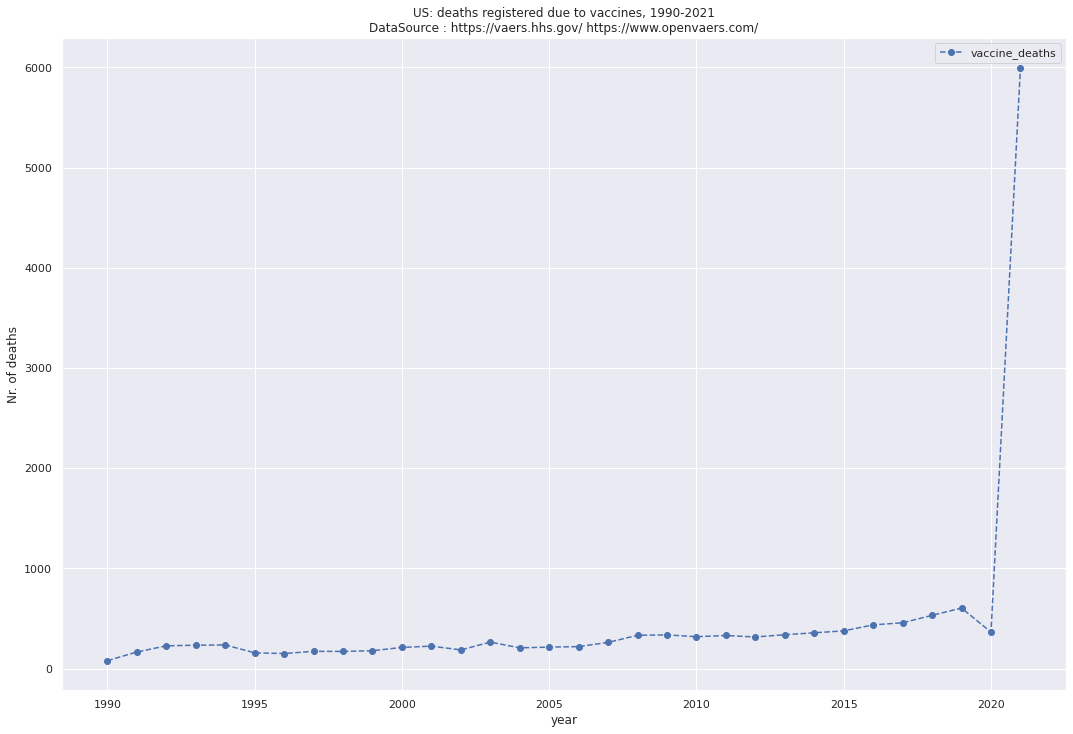

In [62]:
title = 'US: deaths registered due to vaccines, 1990-2021\nDataSource : https://vaers.hhs.gov/ https://www.openvaers.com/'
vaers_df.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('Nr. of deaths')
plt.savefig('vaers_deaths.jpg',format='jpg')

In [57]:
deaths_before_2021 = df.loc[:2020].sum()
deaths_2021 = df.loc[2021]
deaths_before_2021


vaccine_deaths    8679
dtype: int64

In [58]:
### https://www.cdc.gov/flu/prevent/vaccine-supply-historical.htm ###
# note that data originally given as season. I'm using end season year below #

flu_df = pd.read_csv('vaers_cdc_flu_vaccines.csv',header=None,names=['doses_flu_vaccin'])
flu_df.index = pd.date_range('2009','2021',freq='Y').year
flu_df

,doses_flu_vaccin
2009,111
2010,114
2011,155
2012,132
2013,135
2014,135
2015,148
2016,146
2017,146
2018,155


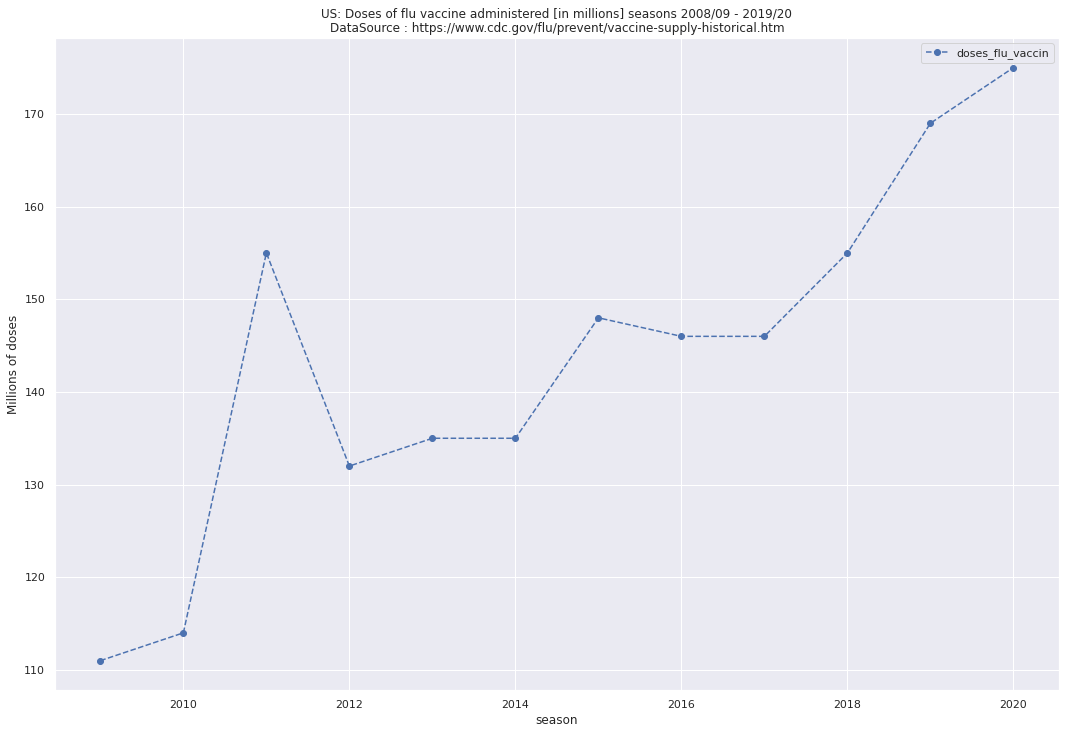

In [63]:
title = 'US: Doses of flu vaccine administered [in millions] seasons 2008/09 - 2019/20\nDataSource : https://www.cdc.gov/flu/prevent/vaccine-supply-historical.htm'
flu_df.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('Millions of doses')
plt.xlabel('season')
plt.savefig('vaers_flu_doses.jpg',format='jpg')

In [64]:
deaths_per_M_doses = (vaers_df['vaccine_deaths'] / flu_df['doses_flu_vaccin']).dropna()
deaths_per_M_doses

2009    3.036036
2010    2.798246
2011    2.135484
2012    2.393939
2013    2.511111
2014    2.651852
2015    2.547297
2016    2.993151
2017    3.136986
2018    3.432258
2019    3.579882
2020    2.085714
dtype: float64

In [91]:
### covid doses administered from https://ourworldindata.org/covid-vaccinations?country=USA###
deaths_per_M_doses_covid_2021 = vaers_df.loc[2021,'vaccine_deaths'] / 174
deaths_per_M_doses_covid_plus_flu_2021 = vaers_df.loc[2021,'vaccine_deaths'] / (174 + 140)
deaths_per_M_doses_covid_plus_flu_2021

19.098726114649683

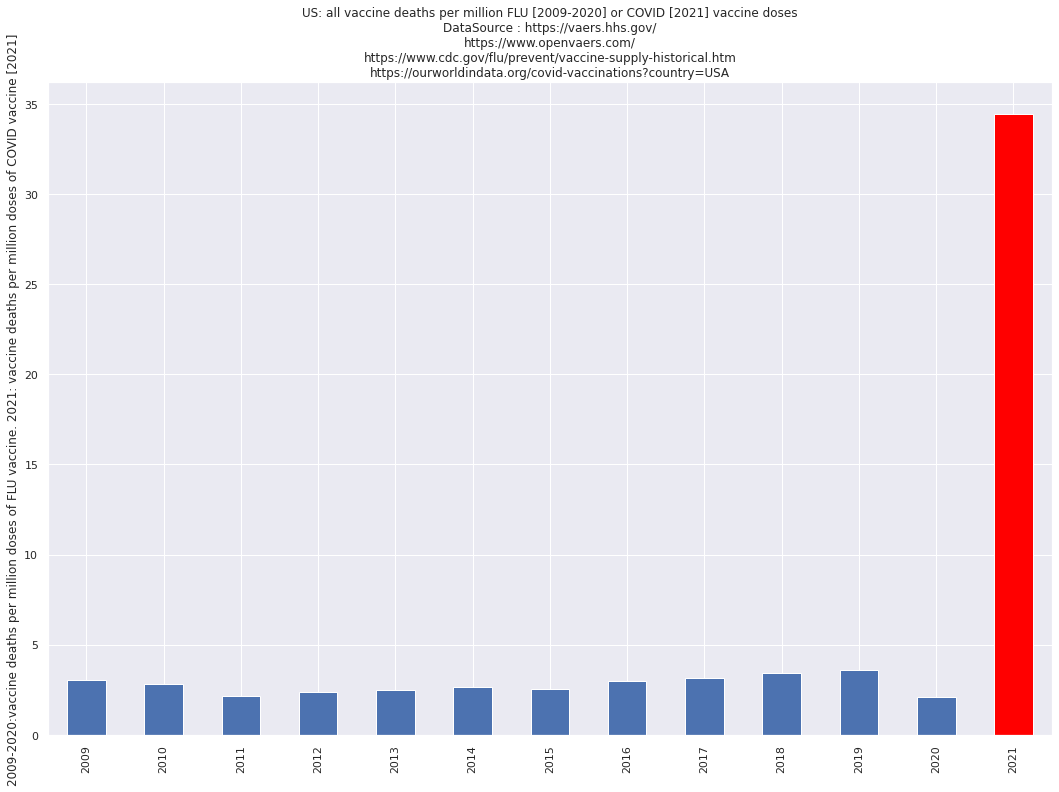

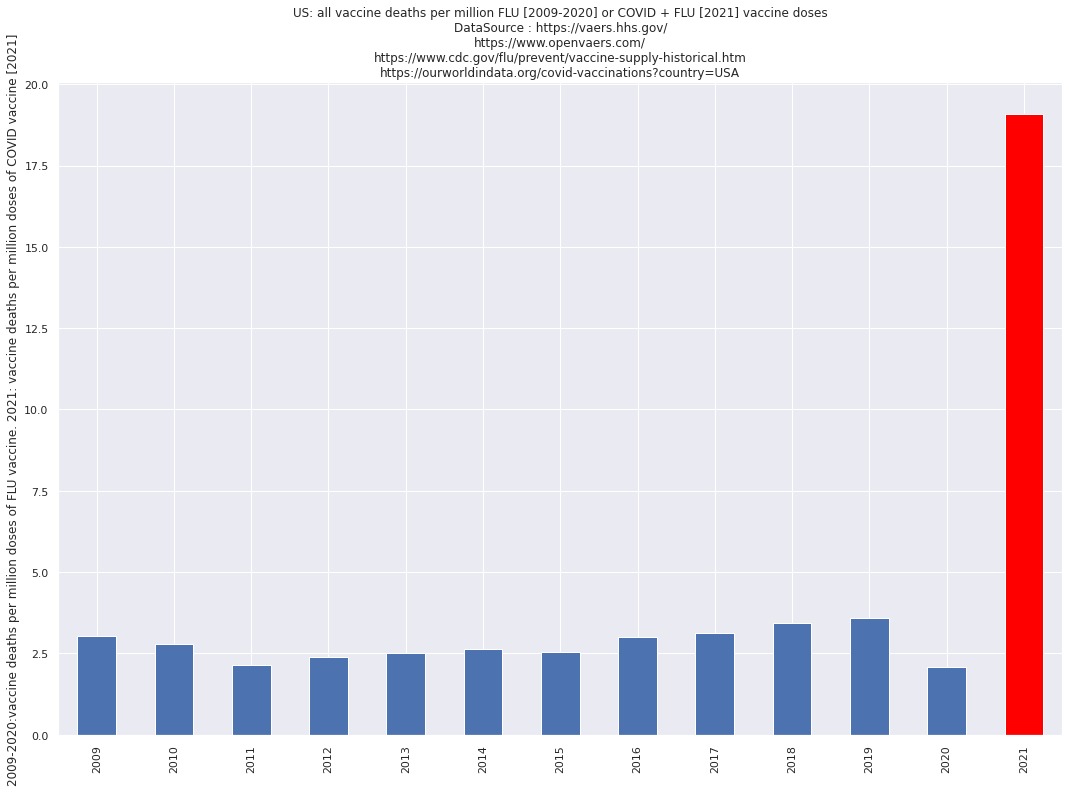

In [92]:
title = 'US: all vaccine deaths per million FLU [2009-2020] or COVID + FLU [2021] vaccine doses\nDataSource : https://vaers.hhs.gov/\nhttps://www.openvaers.com/\nhttps://www.cdc.gov/flu/prevent/vaccine-supply-historical.htm\nhttps://ourworldindata.org/covid-vaccinations?country=USA'
ax = deaths_per_M_doses.plot(kind='bar',figsize=(18,12),title=title)
dummy_series = pd.Series([0] * (len(deaths_per_M_doses)),index=deaths_per_M_doses.index)
dummy_series[2021] = deaths_per_M_doses_covid_plus_flu_2021
dummy_series.plot(ax=ax,kind='bar',color=['red'] * 13)

plt.ylabel('2009-2020:vaccine deaths per million doses of FLU vaccine. 2021: vaccine deaths per million doses of COVID vaccine [2021]')
plt.savefig('vaers_deaths_per_M_doses_covid_plus_flu.jpg',format='jpg')